In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
#高清画图设置
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
#参数模块
a = 50
iters = 1000
lr = 1
sigma = 1

In [4]:
##生成随机点上下各100个
class Randomdots:
    
    def __init__(self,n):
        self.dots1 = np.random.rand(a,2)*0.5
        self.dots2 = 1 - np.random.rand(a,2)*0.5
        self.total_dots = np.concatenate([self.dots1,self.dots2])
        self.w = 0
        
    def plotting(self):
        plt.scatter(self.total_dots[:,0],self.total_dots[:,1])
        plt.xlim((0, 1))
        plt.ylim((0, 1))
        plt.show()

In [5]:
#SOM模块
class SOM:
    def __init__(self,iters,lr):
        self.iters = iters
        self.lr = lr
        self.ratelist = []                    #存放每轮的学习率
#         self.roundlist = []                #存放每轮优胜迭代半径
        self.gridLocation = 0               #竞争层的神经元节点位置坐标
        self.w = 0                             #神经元节点权重
        self.gridDist = 0                   #神经元节点之间的距离
        self.sigma = sigma
     
    #建立竞争层
    def create_grid(self,m,n):
        grid = np.zeros((m*n,2))
        k = 0
        for i in range(m):
            for j in range(n):
                grid[k,:] = np.array([i,j])
                k += 1
        return grid
    
    #欧式距离函数
    def edist(self,x1,x2):
        return np.sqrt(sum((x1-x2)**2))
    
    #计算每个点之间的欧式距离函数
    def calGdist(self,grid):
        m = len(grid)
        Gdist = np.zeros((m,m))
        for i in range(m):
            for j in range(m):
                Gdist[i,j] = self.edist(grid[i],grid[j])
        return Gdist
    
    #高斯距离函数
    def gaussian(self,x, sigma):
        return np.exp(-x**2/(2*sigma**2))
    #学习率更新函数(暂定每次乘以0.95)
    def update_lr(self,i):
        return self.lr*0.98**i
    
    #寻找BMU半径（暂定周围一圈以0.5倍率受到影响）
#     def bestround(self,BMU_idx):
        
#         return 几个index or点
        
    #训练函数
    def train(self,x,m,n):
        n_samples, n_features = x.shape   #例子中是100*2
        self.gridLocation = self.create_grid(m,n)
        self.gridDist = self.calGdist(self.gridLocation)
        temp_lr = self.lr
        #初始化每个点的权重,分散在（0.5,0.5）附近
        w = np.random.random((m*n,n_features))/10 + 0.5
        
        #循环
        #每次随机选择一个点，找到他的BMU，再更新边上一圈的点
        for i in range(self.iters):
            data = x[np.random.randint(0,n_samples,1)[0],:]
            xdist = [self.edist(data,w[row]) for row in range(len(w))]
            BMU_idx = xdist.index(min(xdist))
            #更新节点权重
            #假设每次更新全部节点，步伐为e**距离的倒数
#             temp_array = 1/np.exp(self.gridDist[BMU_idx]).reshape(m*n,1)
            temp_array = self.gaussian(self.gridDist[BMU_idx],self.sigma).reshape(m*n,1)
            temp_array1 = np.hstack((temp_array,temp_array))
            
            w = w + temp_lr * temp_array1*(data - w)
            
            #储存学习率
            self.ratelist.append(temp_lr)
            #更新学习率
            temp_lr = self.update_lr(i)
            #更新sigma
            self.sigma = self.sigma - self.sigma/self.iters
            #画图看一眼
            
#             plt.scatter(w[:,0],w[:,1])
            
        self.w = w
        
        #聚类函数
    def cluster(self,x,m,n): 
        label_list =[]
        #找到距离最短的unit
        for i in range(len(x)):
            dist_list = []
            for j in range(len(self.w)):             
                dist_list.append(np.sqrt(sum((x[i] - self.w[j])**2)))
            label_list.append(dist_list.index(min(dist_list)))
        
        #统计每个unit的个数
        label_number = []
        for i in range(len(self.w)):
            label_number.append(sum(np.array(label_list) == i))        
        return np.array(label_number).reshape(m,n)

In [6]:
#主程序模块
dots = Randomdots(a)
som_test = SOM(iters,lr)
som_test.train(dots.total_dots,5,5)

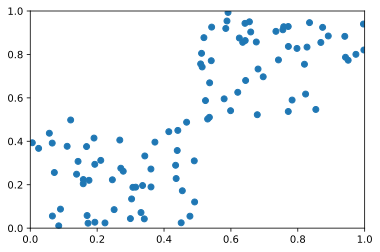

In [7]:
dots.plotting()

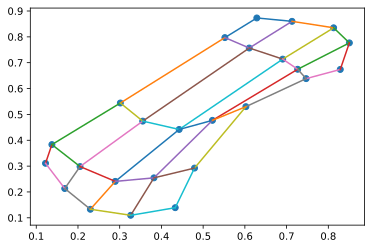

In [8]:
plt.scatter(som_test.w[:,0],som_test.w[:,1])
plt_x = som_test.w[:,0].tolist()
plt_y = som_test.w[:,1].tolist()
m = 5
n = 5 
#横着连线
for i in range(m):
    for j in range(n-1):
        plt.plot(plt_x[i*m+j:i*m+j+2],plt_y[i*m+j:i*m+j+2])

#竖着连线
for i in range(n):
    for j in range(m-1):
        plt.plot([plt_x[i+j*5],plt_x[i+j*5+5]],[plt_y[i+j*5],plt_y[i+j*5+5]])

In [9]:
som_test.w

array([[0.62865456, 0.87301121],
       [0.55211787, 0.79705675],
       [0.30154632, 0.54406131],
       [0.1375012 , 0.38322335],
       [0.12218453, 0.3108496 ],
       [0.71300304, 0.85993476],
       [0.61049402, 0.75671773],
       [0.35516486, 0.47396014],
       [0.20496362, 0.29823968],
       [0.1682867 , 0.21333763],
       [0.81276657, 0.83494574],
       [0.6906744 , 0.71379048],
       [0.44251881, 0.44178218],
       [0.28935067, 0.24093033],
       [0.22967071, 0.13304415],
       [0.85042882, 0.77661947],
       [0.72650834, 0.67457572],
       [0.52226018, 0.47702554],
       [0.38209335, 0.25458595],
       [0.32632336, 0.1097337 ],
       [0.82865751, 0.67389408],
       [0.74681831, 0.63836893],
       [0.60244165, 0.52989072],
       [0.47933792, 0.29238884],
       [0.43308664, 0.13917339]])

In [10]:
som_test.cluster(dots.total_dots,5,5)

array([[10,  5,  0,  7,  3],
       [ 5,  1,  2,  2,  4],
       [ 9,  4,  3,  6,  8],
       [ 5,  0,  2,  4,  4],
       [ 2,  2,  5,  3,  4]])